En esta actividad, trabajaré con una base de datos para explorar la relación entre el tiempo restante al entregar una tarea y la calificación obtenida, utilizando técnicas de regresión no lineal. Parto de la hipótesis de que cuanto más cerca esté el momento de entrega del cierre de la bandeja, menor será la calificación obtenida.

Para este análisis, utilizaré el archivo “A1.6 Tiempo de Entrega.csv”, que contiene información sobre 432 actividades entregadas en la materia de Sistemas Digitales en la Universidad de Monterrey durante el semestre de Otoño 2022.

Los datos están organizados en dos variables principales:

Tiempo: Horas restantes antes del cierre de la bandeja de entrega.
Calificación: Puntuación obtenida en la tarea, en una escala de 0 a 110.

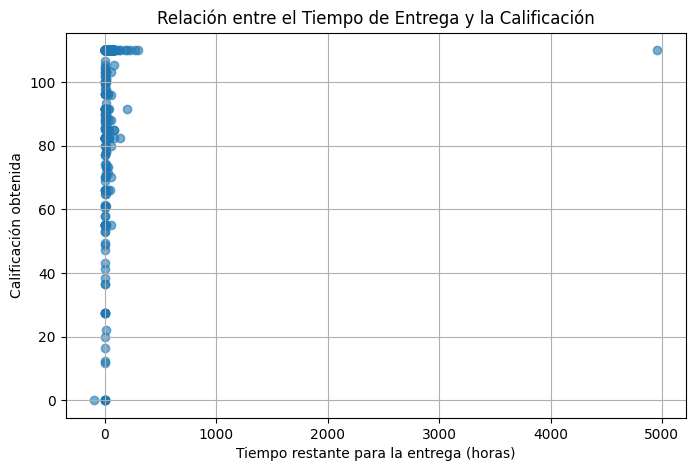

In [137]:
# Se agregan las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
datos = pd.read_csv("A1.6 Tiempo de Entrega.csv")


# Crear la gráfica de dispersión
plt.figure(figsize=(8,5))
plt.scatter(datos['Tiempo'], datos['Calificacion'], alpha=0.6)

# Agregar etiquetas y título
plt.xlabel("Tiempo restante para la entrega (horas)")
plt.ylabel("Calificación obtenida")
plt.title("Relación entre el Tiempo de Entrega y la Calificación")
plt.grid(True)

# Mostrar la gráfica
plt.show()

Al intentar generar la gráfica, encontré que el proceso no se completaba debido a la presencia de valores no numéricos en el archivo. Al revisar el archivo .csv, identifiqué estos valores, los cuales consideré como errores, ya que correspondían a registros con un tiempo de entrega y una calificación de 0. Dado que estos datos no aportaban información relevante al modelo y podrían generar un sesgo en el análisis del tiempo de entrega, decidí eliminarlos para garantizar una representación más precisa de la relación entre ambas variables.

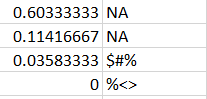

Tambien se detectaron outliers (valores atípicos) en el modelo, por lo que decídi usar el método de Turkey.

Los outliers son:
          Tiempo  Calificacion
29   4960.167000     110.00000
107  -100.000000       0.00000
108   177.090000     110.00000
135   299.986667     110.00000
136   220.310833     110.00000
137   202.196111      91.66666
138   199.105833     110.00000
324   269.995278     110.00000
378   135.675833      82.50000


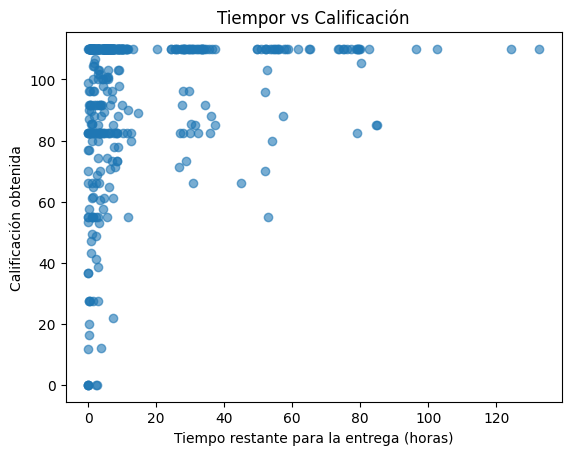

In [138]:
import numpy as np
# Se calcula el IQR y los límites para outliers

q1 = datos['Tiempo'].quantile(0.10)
q3 = datos['Tiempo'].quantile(0.90)
iqr = q3 - q1

li = q1 - 1.5 * iqr # Límite inferior
ls = q3 + 1.5 * iqr #Límite superior

# Se identifican los outliers
outliers = datos[(datos['Tiempo'] < li) | (datos['Tiempo'] > ls)]

# Imprimo los outliers
print("Los outliers son:")
print(outliers)

# Se eliminan los outliers
datos = datos[(datos['Tiempo'] >= li) & (datos['Tiempo'] <= ls)]

# Nueva gráfica de dispersión
plt.scatter(datos['Tiempo'], datos['Calificacion'], alpha=0.6)
plt.xlabel("Tiempo restante para la entrega (horas)")
plt.ylabel("Calificación obtenida")
plt.title("Tiempor vs Calificación")
plt.show()

A continuación, separaré de los datos en conjuntos de entrenamiento y prueba, siguiendo una proporción del 70/30. Posteriormente, calcularé e imprimiré en consola el promedio del tiempo de entrega y la calificación para ambos conjuntos. Finalmente, compararé los resultados obtenidos para analizar posibles diferencias y su impacto en el modelo.

In [139]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento (70%) y prueba (30%)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    datos["Tiempo"], datos["Calificacion"], train_size=0.70, random_state=42
)

# Calcular promedios
mean_X_train = Xtrain.mean()
mean_Y_train = Ytrain.mean()
mean_X_test = Xtest.mean()
mean_Y_test = Ytest.mean()

# Imprimir los promedios
print("Promedio de Tiempo (Entrenamiento):", round(mean_X_train, 2))
print("Promedio de Calificación (Entrenamiento):", round(mean_Y_train, 2))
print("Promedio de Tiempo (Prueba):", round(mean_X_test, 2))
print("Promedio de Calificación (Prueba):", round(mean_Y_test, 2))

Promedio de Tiempo (Entrenamiento): 15.1
Promedio de Calificación (Entrenamiento): 95.5
Promedio de Tiempo (Prueba): 13.33
Promedio de Calificación (Prueba): 93.26


Despues, entrenaré un modelo de regresión polinomial para analizar la relación entre el tiempo de entrega y la calificación obtenida. Seleccionaré el grado del polinomio que mejor se ajuste a los datos para captar posibles patrones no lineales.

In [140]:
# Importar librerías necesarias
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures

# Asegurar que los datos sean arrays de NumPy
Xtrain = np.array(Xtrain).reshape(-1, 1)
Xtest = np.array(Xtest).reshape(-1, 1)

# Se generan polinomios de segundo grado
poly = PolynomialFeatures(degree=2)

# Se ajustan los polinomios a los datos de entrenamiento
xq_train = pd.DataFrame(poly.fit_transform(Xtrain))
xq_test = pd.DataFrame(poly.transform(Xtest))

# Entrenar el modelo de regresión polinomial
model = sm.OLS(list(Ytrain), xq_train).fit()

# Imprimir resumen de resultados
print(model.summary())
print(datos.head())

# Estimar valores de Y en los datos de prueba
y_pred = model.predict(xq_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     10.12
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           5.65e-05
Time:                        17:12:24   Log-Likelihood:                -1321.7
No. Observations:                 293   AIC:                             2649.
Df Residuals:                     290   BIC:                             2660.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0             90.3143      1.768     51.069      0.0

El modelo de regresión polinomial muestra que entregar con más anticipación suele mejorar la calificación, pero este efecto se reduce después de cierto punto. Sin embargo, el modelo solo explica un 6.5% de la variabilidad en las calificaciones, lo que indica que otros factores influyen más en el desempeño de los estudiantes.

Para mejorar la capacidad predictiva del modelo y capturar mejor la relación entre el tiempo de entrega y la calificación, entrenaré un modelo de regresión segmentada. Este enfoque me permitirá dividir los datos en distintos segmentos y ajustar una regresión cuadrática en cada uno, facilitando la identificación de patrones no lineales de manera más precisa. Seguiré la metodología utilizada en la lectura interactiva y generaré predicciones en el conjunto de validación para evaluar el desempeño del modelo.

In [141]:
# Se instala la función necesaria
!pip install mlinsights

In [142]:
# Se importan librerias necesarias
from mlinsights.mlmodel import PiecewiseRegressor

# Se crea y se entrena el modelo usando el término lineal y término cuadratico
models = PiecewiseRegressor('bins').fit(xq_train.values[:,1:],Ytrain)

# y se estima el valor de Y para los datos de prueba
y_preds = models.predict(xq_test.values[:,1:])

En este apartado, entrenaré un modelo de K-Nearest Neighbors (KNN) para regresión, con el propósito de analizar su capacidad para modelar la relación entre el tiempo de entrega y la calificación. Probaré distintos valores de k para determinar cuál ofrece un mejor equilibrio entre sesgo y varianza.

In [143]:
# Se importan las librerias necesarias
from sklearn.neighbors import KNeighborsRegressor

Xtrain = Xtrain.reshape(-1, 1)

# Entrenar modelos de KNN con distintos valores de k
knn_5 = KNeighborsRegressor(n_neighbors=5).fit(Xtrain, Ytrain)
knn_12 = KNeighborsRegressor(n_neighbors=12).fit(Xtrain, Ytrain)
knn_20 = KNeighborsRegressor(n_neighbors=20).fit(Xtrain, Ytrain)

# Generar predicciones en los datos de prueba
Xtest = Xtest.reshape(-1, 1)
y_pred_knn5 = knn_5.predict(Xtest)
y_pred_knn12 = knn_12.predict(Xtest)
y_pred_knn20 = knn_20.predict(Xtest)

A continuación, calcularé el Error Estándar Residual (RSE) para los modelos de regresión polinomial, regresión segmentada y KNN, con el objetivo de evaluar su capacidad predictiva. El RSE mide la desviación promedio entre los valores predichos y los valores observados, permitiendo comparar el desempeño de cada modelo. A través de este análisis, determinaré cuál ofrece un mejor ajuste a los datos y cuál resulta más adecuado para modelar la relación entre el tiempo de entrega y la calificación.

In [144]:
# Calculo del RSE (cuadrático)
RSS_mq = sum((list(Ytest) - y_pred) ** 2)
RSE_mq = np.sqrt(RSS_mq / (len(Ytest) - 1))
print("RSE - Modelo Cuadrático:", RSE_mq)

# Calcular RSE para el modelo de regresión segmentada
RSS_ms = sum((list(Ytest) - y_preds) ** 2)
RSE_ms = np.sqrt(RSS_ms / (len(Ytest) - 1))
print("RSE - Modelo Segmentado:", RSE_ms)

# Calcular RSE para el modelo KNN con diferentes valores de k
# K = 5
RSS_mk1 = sum((list(Ytest) - y_pred_knn5) ** 2)
RSE_mk1 = np.sqrt(RSS_mk1 / (len(Ytest) - 1))
print("RSE - KNN (k=5):", RSE_mk1)

# K = 12
RSS_mk2 = sum((list(Ytest) - y_pred_knn12) ** 2)
RSE_mk2 = np.sqrt(RSS_mk2 / (len(Ytest) - 1))
print("RSE - KNN (k=12):", RSE_mk2)

# K = 20
RSS_mk3 = sum((list(Ytest) - y_pred_knn20) ** 2)
RSE_mk3 = np.sqrt(RSS_mk3 / (len(Ytest) - 1))
print("RSE - KNN (k=20):", RSE_mk3)

RSE - Modelo Cuadrático: 25.667896745126995
RSE - Modelo Segmentado: 23.202235696823596
RSE - KNN (k=5): 24.2094602581791
RSE - KNN (k=12): 22.49841448182611
RSE - KNN (k=20): 23.009379547236144


El modelo KNN con k=20 presentó el menor RSE (23.00), lo que sugiere una mayor precisión en la predicción. No obstante, la regresión polinomial proporciona una mejor interpretabilidad, ya que permite describir la relación entre el tiempo de entrega y la calificación mediante una ecuación matemática. Por su parte, la regresión segmentada, con un RSE de 23.22, resulta útil para capturar variaciones en la tendencia. En este sentido, si el objetivo principal es minimizar el error, KNN es la alternativa más eficiente; sin embargo, si se prioriza la explicabilidad del modelo, la regresión polinomial o segmentada resulta más adecuada.

A continuación, compararé los tres modelos utilizados (regresión polinomial, segmentada y KNN) mediante una gráfica que muestre las calificaciones reales junto con las predicciones de cada modelo. Esto permitirá analizar visualmente qué tan bien se ajusta cada modelo a los datos y evaluar cuál representa mejor la relación entre el tiempo de entrega y la calificación.

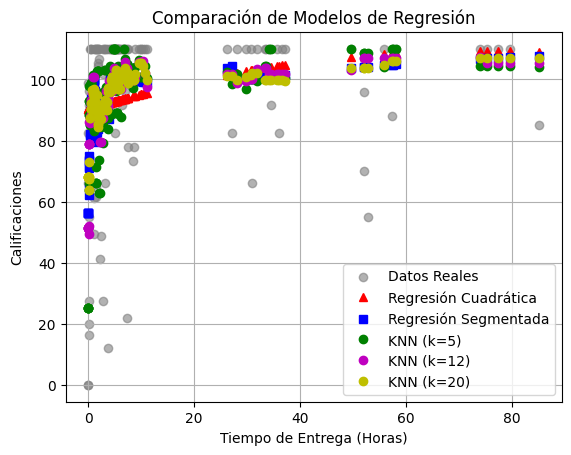

In [145]:
import matplotlib.pyplot as plt

# Graficar calificaciones reales
plt.scatter(Xtest, Ytest, color='gray', alpha=0.6, label="Datos Reales")

# Graficar predicciones de cada modelo con diferentes colores y estilos
plt.plot(Xtest, y_pred, "r^", label="Regresión Cuadrática")  # Triángulos rojos
plt.plot(Xtest, y_preds, "bs", label="Regresión Segmentada")  # Cuadrados azules
plt.plot(Xtest, y_pred_knn5, "go", label="KNN (k=5)")  # Círculos verdes
plt.plot(Xtest, y_pred_knn12, "mo", label="KNN (k=12)")  # Círculos morados
plt.plot(Xtest, y_pred_knn20, "yo", label="KNN (k=20)")  # Círculos amarillos

# Configuración del gráfico
plt.title("Comparación de Modelos de Regresión")
plt.xlabel("Tiempo de Entrega (Horas)")
plt.ylabel("Calificaciones")
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.show()

Con base en la gráfica y los valores de RSE obtenidos, el modelo con mejor precisión en las predicciones es KNN con k=20, al presentar el menor RSE. Sin embargo, si el objetivo es priorizar la interpretabilidad del modelo, la regresión cuadrática y segmentada son opciones más adecuadas, ya que permiten analizar de manera más clara la relación entre el tiempo de entrega y la calificación."